In [20]:
import json
from pprint import pprint
with open('C:/Users/ADMIN/Desktop/sxmb.json',encoding='utf-8') as f:
    data = json.load(f)
pprint(data)
#data.describe()

[{'date': '17-5-2006', 'result_spe': '42520'},
 {'date': '15-5-2006', 'result_spe': '63784'}]


In [4]:
import pandas as pd
import numpy as np
import matplotlib as plt


In [5]:
data = pd.read_json('C:/Users/ADMIN/PycharmProjects/Hamy/tutorial/tutorial/Output/nsxmb.json')
data

,result_spe,date
0,42520,2006-05-17
1,23982,2006-05-16
2,63784,2006-05-15
3,51235,2006-05-18
4,4877,2006-05-20
...,...,...
4995,98628,2020-10-08
4996,40128,2020-11-08
4997,36852,2020-12-08
4998,42857,2020-08-13


In [6]:
for i in range(0,5000):
    data['result_spe'][i] = int(data['result_spe'][i])%100
data['result_spe']

C:\Users\ADMIN\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0       20
1       82
2       84
3       35
4       77
        ..
4995    28
4996    28
4997    52
4998    57
4999    80
Name: result_spe, Length: 5000, dtype: int64

In [5]:
data

,result_spe,date
0,20,2006-05-17
1,82,2006-05-16
2,84,2006-05-15
3,35,2006-05-18
4,77,2006-05-20
...,...,...
4995,28,2020-10-08
4996,28,2020-11-08
4997,52,2020-12-08
4998,57,2020-08-13


In [7]:
df = data.groupby('result_spe').describe()
df

date                                             
           count unique        top freq      first       last
result_spe                                                   
0             49     49 2020-05-19    1 2006-01-06 2020-05-19
1             60     60 2006-10-09    1 2006-06-19 2020-03-15
2             51     51 2006-01-08    1 2006-01-08 2020-07-15
3             48     48 2015-07-19    1 2006-10-30 2020-04-23
4             40     40 2017-12-26    1 2006-04-07 2020-08-01
...          ...    ...        ...  ...        ...        ...
95            41     41 2010-07-16    1 2006-06-29 2020-05-15
96            47     47 2016-03-24    1 2006-07-07 2020-11-02
97            50     50 2009-05-12    1 2006-06-10 2020-07-24
98            60     60 2016-12-29    1 2006-11-17 2020-05-22
99            48     48 2009-10-27    1 2006-08-28 2019-08-02

[100 rows x 6 columns]

In [8]:
df = data.groupby('result_spe').result_spe.max()
df

result_spe
0      0
1      1
2      2
3      3
4      4
      ..
95    95
96    96
97    97
98    98
99    99
Name: result_spe, Length: 100, dtype: int64

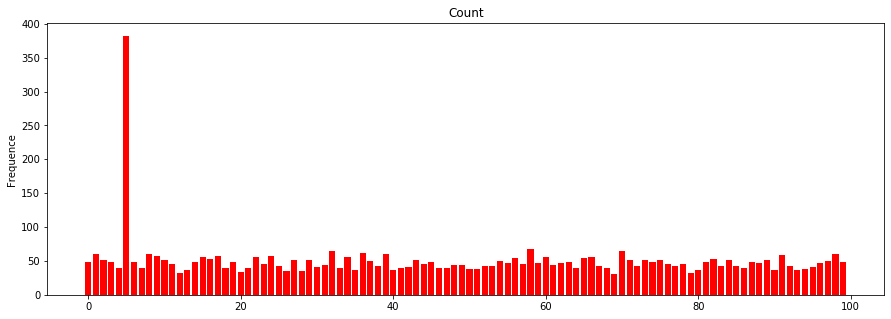

In [9]:
import matplotlib.pyplot as plt
import numpy as np
df = data.groupby('result_spe').result_spe.count()

plt.figure(figsize=(15,5))
plt.title("Count")
tmp = dict(df)
#tmp.values()
plt.ylabel("Frequence")
plt.bar(tmp.keys(),tmp.values(),color = 'red')
plt.show()

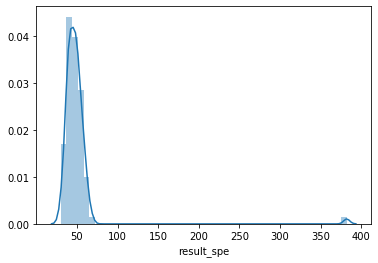

In [10]:
import seaborn as sns
%matplotlib inline

sns.distplot(df)
#sns.jointplot(x="x",y="y",data = tmp)

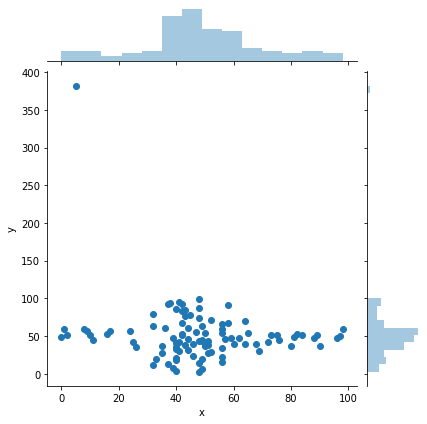

In [11]:
arr=[]
for x in tmp:
    arr.append({x,tmp.get(x)})
ntmp = pd.DataFrame(arr,columns=["x","y"])
sns.jointplot(x="x",y="y",data = ntmp)
#sns.jointplot(x=tmp.keys(),y=tmp.values(),data=tmp)

In [127]:
ntmp

,x,y
0,0,49
1,1,60
2,2,51
3,48,3
4,40,4
...,...,...
95,41,95
96,96,47
97,97,50
98,98,60


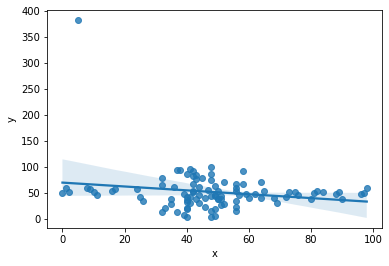

In [12]:
sns.regplot(x="x", y="y", data=ntmp)

In [70]:
df = data.loc[data.result_spe==30].date
tmp = dict(df)
arr = list(tmp.values())
arr.sort()
parse = dict()
for i in range(len(arr)-1):
    parse[i] = (arr[i+1]-arr[i]).days
    #print(arr[i+1]-arr[i])
parse

{0: 26,
 1: 216,
 2: 75,
 3: 143,
 4: 212,
 5: 170,
 6: 9,
 7: 147,
 8: 39,
 9: 138,
 10: 80,
 11: 72,
 12: 9,
 13: 36,
 14: 16,
 15: 217,
 16: 21,
 17: 150,
 18: 8,
 19: 384,
 20: 499,
 21: 241,
 22: 85,
 23: 352,
 24: 387,
 25: 56,
 26: 204,
 27: 11,
 28: 31,
 29: 179,
 30: 51,
 31: 25,
 32: 130,
 33: 4,
 34: 84,
 35: 168,
 36: 23,
 37: 181,
 38: 169,
 39: 109}

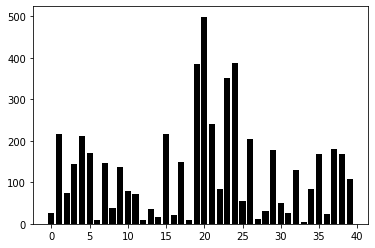

In [72]:
plt.bar(parse.keys(),parse.values(),color = 'black')
plt.show()